In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
plt.style.use("ggplot")

In [210]:
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks (3).xlsx


In [211]:
df = pd.read_excel('AdventureWorks.xlsx')

In [212]:
df.shape

(904, 16)

In [213]:
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [214]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [215]:
#Analisando se há missing values.
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

##Qual o período (em anos) em análise?

In [216]:
ano_min=df['Data Venda'].dt.year.min()
ano_max=df['Data Venda'].dt.year.max()
print('A análise compreende vendas realizadas entre os anos de {} e {}.'.format(ano_min,ano_max))

A análise compreende vendas realizadas entre os anos de 2008 e 2009.


#**ANÁLISE DE RECEITA, CUSTO E LUCRO NO PERÍODO**

##Qual foi a receita total durante todo o período em análise?

In [217]:
receita_total = df['Valor Venda'].sum()
print('A receita total foi de $ {:,.2f}'.format(receita_total))

A receita total foi de $ 5,984,606.14


##Qual foi o custo total durante todo o período em análise?

In [218]:
df['Custo'] = df['Custo Unitário']*df['Quantidade']

In [219]:
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [220]:
custo_total = df['Custo'].sum()
print('O custo total foi de $ {:,.2f}'.format(custo_total))

O custo total foi de $ 2,486,783.05


## Qual foi o lucro gerado no período total em análise (2008-2009)?

In [221]:
#Criando uma coluna de lucro para cada venda, a qual poderá ser utilizada para posterior análise
df['Lucro'] = df['Valor Venda']-df['Custo']

In [222]:
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [223]:
lucro_total = receita_total - custo_total
print('O lucro total foi de $ {:,.2f}'.format(lucro_total))

O lucro total foi de $ 3,497,823.09


##Qual foi o lucro gerado por ano?

In [224]:
#Criando uma coluna com o ano de cada venda para facilitar a análise e visualização:
df['Ano Venda']= df['Data Venda'].dt.year
lucro_anual=round(df['Lucro'].groupby(by=df['Ano Venda']).sum(),2)
print('O lucro total no ano de 2008 foi de ${:,.2f}.'.format(lucro_anual[2008]))
print('O lucro total no ano de 2009 foi de ${:,.2f}.'.format(lucro_anual[2009]))
print('Houve um decréscimo de ${:,.2f}.'.format(lucro_anual[2008]-lucro_anual[2009]))
print('O decréscimo percentual foi de {:.2f}%.'.format((lucro_anual[2008]-lucro_anual[2009])*100/lucro_anual[2008]))

O lucro total no ano de 2008 foi de $1,920,077.71.
O lucro total no ano de 2009 foi de $1,577,745.38.
Houve um decréscimo de $342,332.33.
O decréscimo percentual foi de 17.83%.


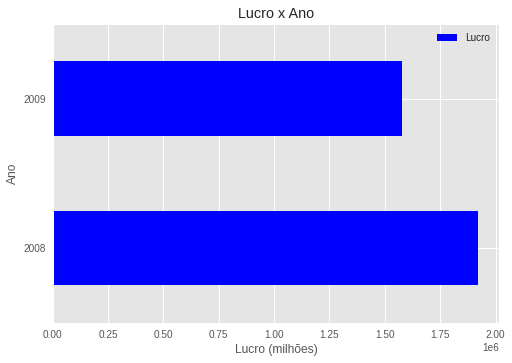

In [225]:
lucro_anual.plot.barh(title='Lucro x Ano', color='blue', align='center')
plt.xlabel('Lucro (milhões)')
plt.ylabel('Ano')
plt.legend()

#**ANÁLISE DAS VENDAS POR ANO**

##Qual foi o produto mais vendido em todo o período?

In [226]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

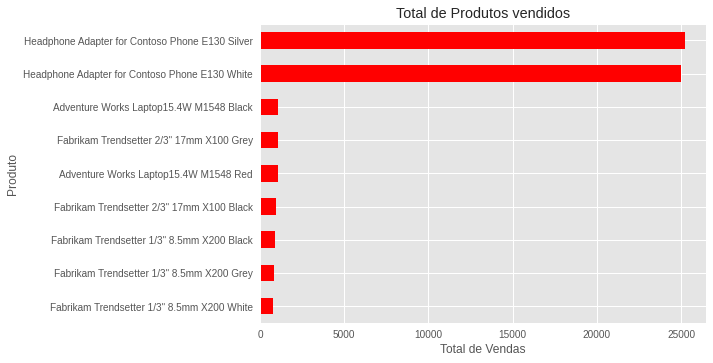

In [227]:
#Confeccionando um gráfico de barras para verificar quantidade de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title='Total de Produtos vendidos', color = 'red')
plt.xlabel("Total de Vendas")
plt.ylabel("Produto")

##O quanto cada marca gerou de lucro?

In [228]:
round(df.groupby([df["Data Venda"].dt.year,"Marca"])["Lucro"].sum(),2)
#Verifica-se que a maior geradora de receita é a marca FABRIKAM

Data Venda  Marca          
2008        Adventure Works     306641.16
            Contoso              56416.00
            Fabrikam           1557020.55
2009        Adventure Works     405395.08
            Contoso             138258.95
            Fabrikam           1034091.35
Name: Lucro, dtype: float64

##**ANÁLISE DO ANO DE 2008**

In [229]:
#Selecionando apenas as vendas de 2008
df_2008=df[df['Ano Venda']==2008]
df_2008.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Ano Venda
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2008
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2008
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2008
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2008
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2008


###**Qual foi o produto mais vendido de 2008?**

In [230]:
df_2008.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    7333
Headphone Adapter for Contoso Phone E130 White     7300
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           630
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black         582
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey          548
Fabrikam Trendsetter 2/3'' 17mm X100 Black          517
Adventure Works Laptop15.4W M1548 Black             456
Adventure Works Laptop15.4W M1548 Red               452
Fabrikam Trendsetter 1/3'' 8.5mm X200 White         394
Name: Quantidade, dtype: int64

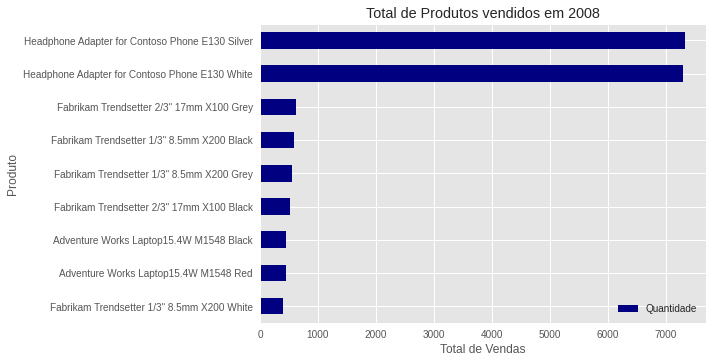

In [231]:
df_2008.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title='Total de Produtos vendidos em 2008', color = '#000080')
plt.xlabel("Total de Vendas")
plt.ylabel("Produto")
plt.legend()

###**Qual foi o lucro mensal no ano de 2008?**

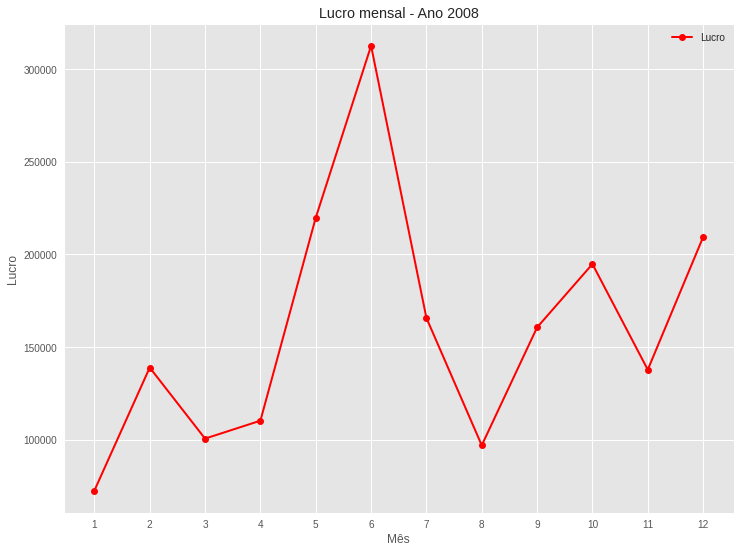

In [232]:
plt.figure(figsize=(12,9))
df_2008.groupby(df["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro mensal - Ano 2008", marker='o', color='red', linewidth=2)
plt.xlabel('Mês')
plt.xticks(range(1,13,1))
plt.ylabel('Lucro')
plt.legend()
###Indica que o mês de maior lucratividade em 2008 foi o mês de JUNHO.

##**ANÁLISE DO ANO DE 2009**

In [233]:
#Selecionando apenas as vendas de 2009
df_2009=df[df['Ano Venda']==2009]
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Ano Venda
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2009
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2009
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2009
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2009
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2009


###**Qual foi o produto mais vendido de 2009?**

In [234]:
df_2009.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    17899
Headphone Adapter for Contoso Phone E130 White     17708
Adventure Works Laptop15.4W M1548 Black              633
Adventure Works Laptop15.4W M1548 Red                595
Fabrikam Trendsetter 2/3'' 17mm X100 Grey            457
Fabrikam Trendsetter 2/3'' 17mm X100 Black           409
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          395
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          302
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           297
Name: Quantidade, dtype: int64

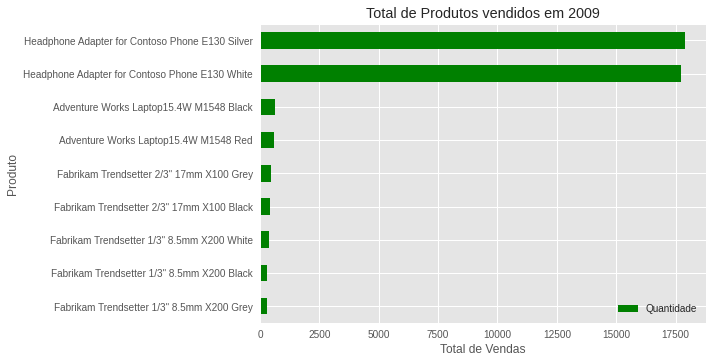

In [235]:
df_2009.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title='Total de Produtos vendidos em 2009', color = 'g')
plt.xlabel("Total de Vendas")
plt.ylabel("Produto")
plt.legend()

###**Qual foi o lucro mensal no ano de 2009?**

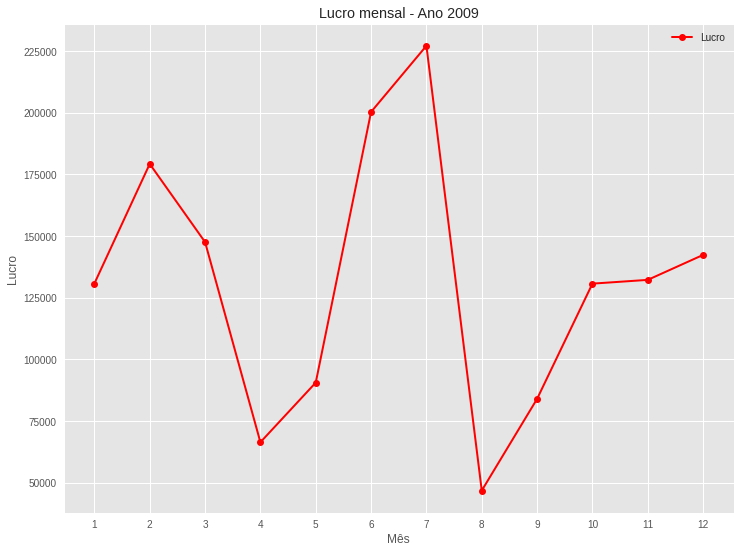

In [236]:
plt.figure(figsize=(12,9))
df_2009.groupby(df["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro mensal - Ano 2009", marker='o', color='red', linewidth=2)
plt.xlabel('Mês')
plt.xticks(range(1,13,1))
plt.ylabel('Lucro')
plt.legend()
###Indica que o mês de maior lucratividade em 2009 foi o mês de JULHO.

#**ANÁLISE DO TEMPO DE ENVIO DOS PRODUTOS**

In [237]:
#Criando uma coluna no dataframe que indica o tempo de envio de cada venda (em dias)
df['Tempo Envio']=(df['Data Envio']-df['Data Venda']).dt.days
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Ano Venda,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2008,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2008,5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2008,6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2008,6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2008,7


##Qual o menor e maior tempo de envio de cada marca?

In [238]:
#Maior tempo de envio de cada marca
df.groupby("Marca")["Tempo Envio"].max()


Marca
Adventure Works    20
Contoso            13
Fabrikam           13
Name: Tempo Envio, dtype: int64

In [239]:
#Menor tempo de envio de cada marca
df.groupby("Marca")["Tempo Envio"].min()

Marca
Adventure Works    4
Contoso            4
Fabrikam           4
Name: Tempo Envio, dtype: int64

##Qual a média do tempo de envio de cada marca?

In [240]:
#Média do tempo de envio de cada marca
round(df.groupby("Marca")["Tempo Envio"].mean(),2)

Marca
Adventure Works    8.66
Contoso            8.47
Fabrikam           8.51
Name: Tempo Envio, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7f144a822150>],
 'caps': [<matplotlib.lines.Line2D at 0x7f144a829150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f144a7b2190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f144a829c10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f144a822690>,
  <matplotlib.lines.Line2D at 0x7f144a822bd0>]}

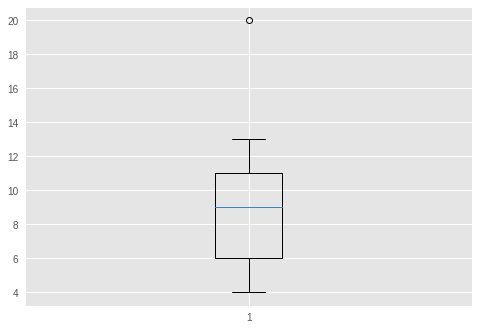

In [241]:
#Identificando se há algum outlier de tempo de envio
plt.boxplot(df["Tempo Envio"])

In [242]:
#Identificando qual foi exatamente a venda em que o tempo de envio foi ultrapassado além do normal
df[df["Tempo Envio"]==20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Ano Venda,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2008,20


## Qual a média de tempo de envio por loja?

In [243]:
#Identificando quantas e quais são as lojas
df["ID Loja"].unique()

array([199, 306, 307])

Text(0, 0.5, 'ID Loja')

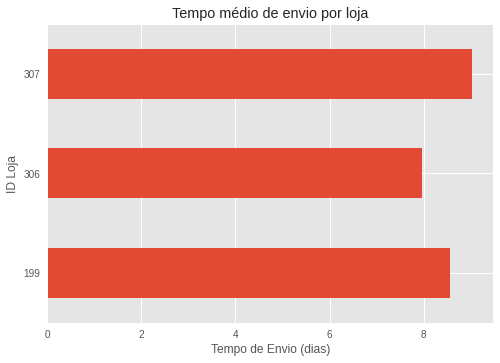

In [244]:
df.groupby(df["ID Loja"])["Tempo Envio"].mean().plot.barh(title='Tempo médio de envio por loja')
plt.xlabel('Tempo de Envio (dias)')
plt.ylabel('ID Loja')

## Qual o tempo médio de envio de cada produto?

Text(0, 0.5, 'Produto')

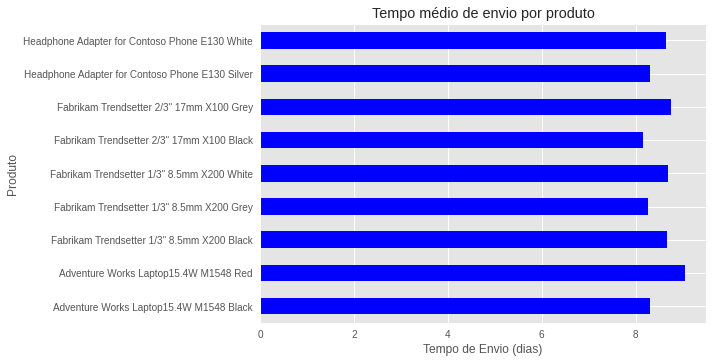

In [245]:
df.groupby(df["Produto"])["Tempo Envio"].mean().plot.barh(title='Tempo médio de envio por produto', color='b')
plt.xlabel('Tempo de Envio (dias)')
plt.ylabel('Produto')